In [89]:
import os
import matplotlib.pyplot as plt
import numpy as np
import json
from imageio import imread

## Dataset 1

In [228]:
images_folder = "/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/images"
annotation_folder = "/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations"
colors = {"face_with_mask": "c", "face_no_mask": "r", "face_other_covering": "y", "face_with_mask_incorrect": "orange", 
         "mask_surgical": "b"}

In [229]:
annot_file_path_list = []
for file in sorted(os.listdir(annotation_folder)):
    annot_file_path_list.append(os.path.join(annotation_folder, file))
# print(annot_file_path_list)

In [230]:
class_dict = {}
for file in annot_file_path_list:
    with open(file) as json_file:
        data = json.load(json_file)
        annotations = data['Annotations']
        for annot in annotations:
            classname = annot['classname']
            if class_dict.get(classname, None) is None:
                class_dict[classname] = 1
            else:
                class_dict[classname] += 1

print(class_dict)

{'face_no_mask': 1569, 'face_with_mask': 4180, 'mask_surgical': 2430, 'hat': 823, 'eyeglasses': 914, 'face_other_covering': 1372, 'face_with_mask_incorrect': 150, 'mask_colorful': 1876, 'helmet': 187, 'sunglasses': 358, 'scarf_bandana': 260, 'hair_net': 287, 'goggles': 192, 'face_shield': 160, 'hijab_niqab': 173, 'turban': 94, 'balaclava_ski_mask': 134, 'gas_mask': 55, 'hood': 159, 'other': 39}


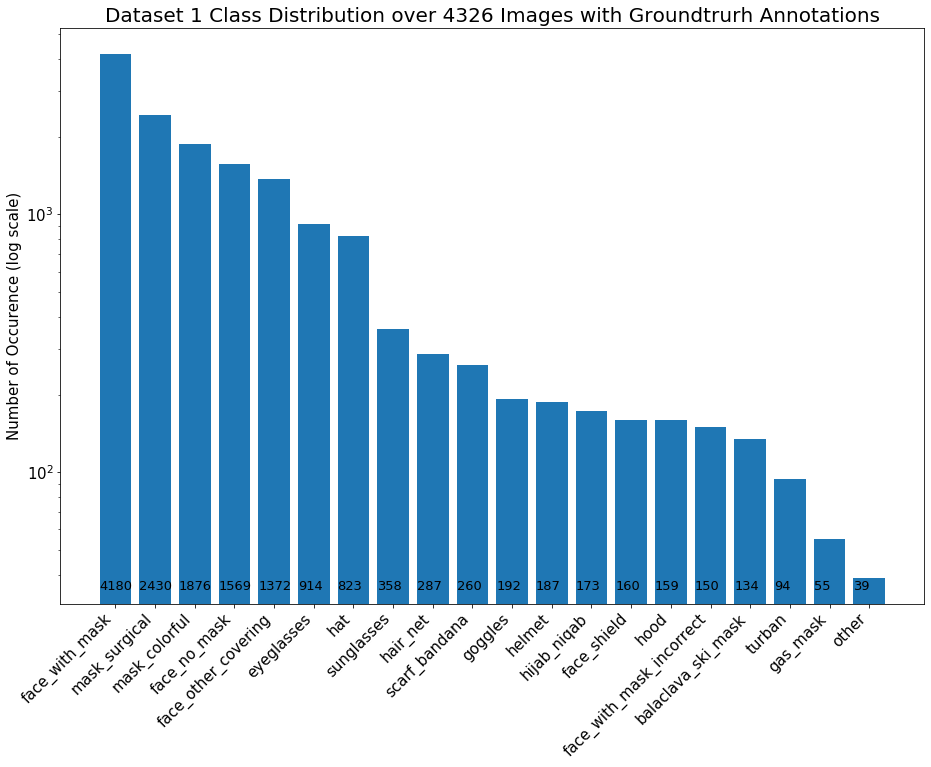

In [194]:
names = list(class_dict.keys())
values = list(class_dict.values())

sorted_names = [names[i] for i in np.argsort(values)][::-1]
sorted_values = sorted(values)[::-1]

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
ax.bar(sorted_names, sorted_values, log=True)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.set_xticklabels(sorted_names, rotation = 45, ha="right")

ax.set_title('Dataset 1 Class Distribution over {} Images with Groundtrurh Annotations'.format(len(annot_file_path_list)), fontsize=20)
ax.set_ylabel('Number of Occurence (log scale)', fontsize=15)


for i, v in enumerate(sorted_values):
    ax.text(i-.4, 35, sorted_values[i], fontsize=13)
plt.show()
fig.savefig('dataset_1_distribution.png', dpi=300, format='png', bbox_inches='tight')

In [57]:
img_file_path_list = []
for file in sorted(os.listdir(images_folder)):
    img_file_path_list.append(os.path.join(images_folder, file))
# print(img_file_path_list)

In [58]:
len(img_file_path_list) == len(annot_file_path_list)

False

In [79]:
err = 0
for i, file in enumerate(sorted(os.listdir(images_folder))):
    if (i+1+err) != int(file.split('.')[0]):
        err += int(file.split('.')[0]) - (i+1+err)
        print(file)

0009.jpg
0014.jpg
0017.jpg
0048.jpg
0081.jpg
0085.png
0087.png
0091.jpg
0106.png
0119.jpg
0158.jpg
0208.jpg
0227.jpg
0293.jpg
0337.jpg
0349.jpg
0359.jpg
0387.png
0394.jpg
0398.jpg
0400.jpg
0406.jpg
0409.jpg
0433.jpg
0437.jpg
0469.jpg
0513.jpg
0561.jpg
0601.jpg
0638.jpg
0748.jpg
0769.jpg
0799.jpg
0817.jpg
0820.jpg
0841.jpg
0855.jpg
0857.jpg
0860.jpg
0869.jpg
0878.jpg
0880.jpg
0883.jpg
0887.jpg
0900.jpg
0904.jpg
0945.jpg
1011.jpg
1019.jpg
1046.jpg
1050.jpg
1057.jpg
1061.jpg
1074.jpeg
1083.jpg
1085.jpg
1101.jpg
1127.jpg
1151.jpg
1185.jpg
1187.jpg
1195.jpg
1204.jpg
1226.jpg
1229.jpg
1232.jpg
1274.jpg
1283.jpg
1288.jpg
1312.jpg
1327.jpg
1332.jpg
1355.jpg
1358.jpg
1402.jpg
1409.jpg
1415.jpg
1476.jpg
1484.jpg
1598.jpg
1608.jpeg
1647.jpg
1677.jpg
1680.jpg
1697.jpg
1720.jpeg
1737.png
1756.png
1765.jpg
1769.jpg
1799.jpg
1817.jpg
1847.jpg
1861.jpg
1864.jpg
1870.jpg
1872.jpg
1884.jpg
1899.jpeg
1909.jpg
1938.jpg
1943.jpg
1945.jpg
1967.jpg
2004.jpg
2024.jpg
2031.jpg
2036.jpg
2040.jpg
2058.jpg
2079.j

In [78]:
print(err)

411


In [87]:
annot_path = annot_file_path_list[9]
img_path = annot_path[:-5].replace('annotations', 'images')
print(img_path)
print(img_path == img_file_path_list[1707])
with open(annot_path) as json_file:
        data = json.load(json_file)
        print(data)

/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/images/1810.jpg
True
{'FileName': '1810.jpg', 'NumOfAnno': 12, 'Annotations': [{'isProtected': False, 'ID': 358602113107519552, 'BoundingBox': [99, 212, 233, 373], 'classname': 'face_with_mask_incorrect', 'Confidence': 1, 'Attributes': {}}, {'isProtected': False, 'ID': 196671362884815680, 'BoundingBox': [363, 189, 478, 343], 'classname': 'face_with_mask', 'Confidence': 1, 'Attributes': {}}, {'isProtected': False, 'ID': 172886745281646368, 'BoundingBox': [581, 198, 693, 317], 'classname': 'face_with_mask', 'Confidence': 1, 'Attributes': {}}, {'isProtected': False, 'ID': 298124074465591296, 'BoundingBox': [773, 228, 863, 338], 'classname': 'face_with_mask', 'Confidence': 1, 'Attributes': {}}, {'isProtected': False, 'ID': 72017007939024104, 'BoundingBox': [875, 231, 954, 328], 'classname': 'face_with_mask_incorrect', 'Confidence': 1, 'Attributes': {}}, {'isProtected': False, 'ID': 302120286279792256, 'BoundingBox':

In [233]:
for file in annot_file_path_list:
    with open(file) as json_file:
        data = json.load(json_file)
        annotations = data['Annotations']
        for annot in annotations:
            classname = annot['classname']
#             if classname == 'face_with_mask_incorrect':
#                 print(file)
            if classname == 'face_other_covering':
                print(file)

/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/1807.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/1817.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/1820.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/1821.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/1824.jpeg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/1830.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/1833.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/1834.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/1834.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/183

/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/2151.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/2157.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/2157.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/2165.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/2186.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/2196.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/2197.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/2198.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/2200.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/2206

/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/2660.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/2665.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/2667.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/2670.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/2682.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/2682.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/2692.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/2695.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/2696.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/2697

/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/3254.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/3255.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/3256.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/3257.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/3258.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/3259.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/3261.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/3270.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/3271.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/3271

/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/3754.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/3756.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/3762.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/3765.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/3766.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/3791.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/3802.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/3803.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/3822.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/3831

/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/4256.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/4258.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/4264.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/4264.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/4266.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/4294.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/4308.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/4315.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/4315.png.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/4319

/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/5000.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/5029.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/5029.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/5032.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/5035.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/5039.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/5042.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/5042.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/5042.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/5042

/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/5606.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/5611.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/5611.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/5616.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/5617.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/5618.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/5619.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/5622.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/5628.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/5629

/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/5756.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/5762.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/5798.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/5807.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/5808.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/5809.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/5817.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/5817.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/5833.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/5841

/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/6228.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/6236.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/6239.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/6243.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/6248.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/6248.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/6255.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/6264.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/6266.jpg.json
/Users/jasonzhou/Downloads/dataset1/Medical_mask/Medical_mask/Medical_Mask/annotations/6266

In [225]:
def draw_bbox(img, annotations, out_path=None):
    height, width, _ = img.shape
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 2, 2])
    ax.imshow(img)
    for annot in annotations:
        classname = annot['classname']
        bbox = np.array(annot['BoundingBox'])
#         print(bbox)
        ax.add_patch(plt.Rectangle(tuple(bbox[:2]), bbox[2]-bbox[0], bbox[3]-bbox[1], 
                                   edgecolor=colors.get(classname, "g"), linewidth=4, facecolor="None"))
        plt.text(bbox[0], bbox[1], classname, fontsize=18, color=colors.get(classname, "g"))
#     plt.show()
    if out_path is not None:
        plt.savefig(out_path, bbox_inches='tight')

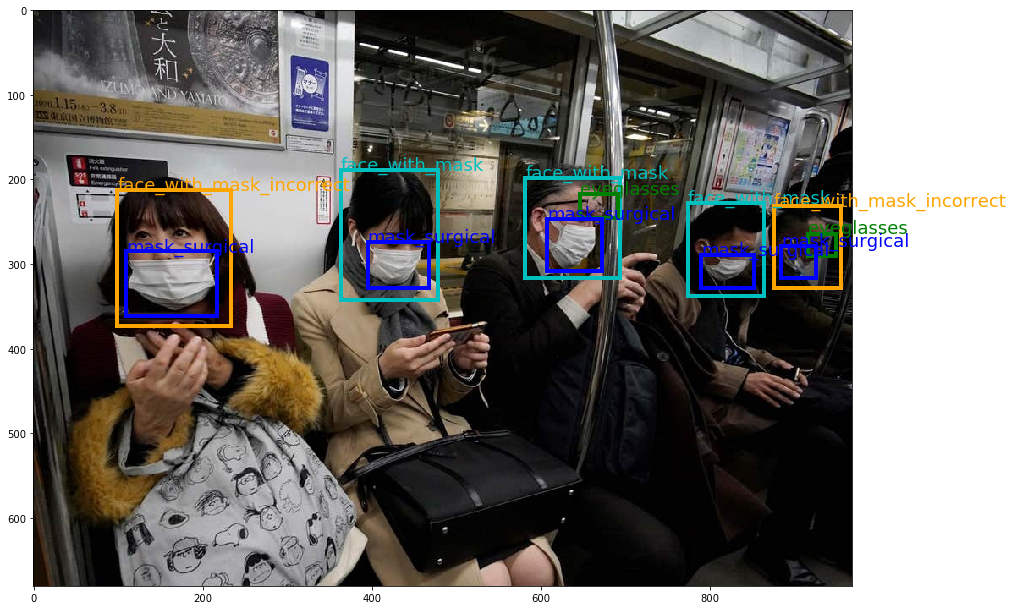

In [226]:
for i, annot_path in enumerate(annot_file_path_list):
    if i == 9:
        img_path = annot_path[:-5].replace('annotations', 'images')
        img = imread(img_path)

        with open(annot_path) as json_file:
            data = json.load(json_file)
            annotations = data['Annotations']
            draw_bbox(img, annotations, 'sample_1810_bbox.jpg')


### Dataset 2

In [218]:
d2_images_folder = "/Users/jasonzhou/Downloads/dataset2/images"
d2_annotation_folder = "/Users/jasonzhou/Downloads/dataset2/annotations"
d2_colors = {"with_mask": "c", "without_mask": "r", "mask_weared_incorrect": "orange"}

In [187]:
d2_annot_file_path_list = []
for file in sorted(os.listdir(d2_annotation_folder)):
    d2_annot_file_path_list.append(os.path.join(d2_annotation_folder, file))
# print(d2_annot_file_path_list)

In [201]:
import xml.etree.ElementTree as et
d2_class_dict = {}
for file in d2_annot_file_path_list:
    xml = et.parse(file)
    root = xml.getroot()
    for i in range(4, len(root)):  # index 4 is where 'object' starts
        classname = root[i][0].text
        if d2_class_dict.get(classname, None) is None:
            d2_class_dict[classname] = 1
        else:
            d2_class_dict[classname] += 1
        
print(d2_class_dict)

{'without_mask': 717, 'with_mask': 3232, 'mask_weared_incorrect': 123}


In [196]:
xml = et.parse('/Users/jasonzhou/Downloads/dataset2/annotations/maksssksksss11.xml')
root = xml.getroot()

for i in range(4, len(root)):  # index 4 is where 'object' starts
    temp = []
    temp.append(root[i][0].text)
    for point in root[i][5]:  # index 5 is where 'bndbox' starts
        temp.append(point.text)
    print(temp)

['mask_weared_incorrect', '23', '114', '77', '172']
['with_mask', '147', '157', '200', '211']
['with_mask', '201', '191', '230', '234']
['with_mask', '243', '192', '293', '247']
['with_mask', '309', '182', '346', '224']
['with_mask', '249', '108', '276', '140']
['with_mask', '275', '99', '303', '128']
['with_mask', '195', '90', '214', '113']
['with_mask', '214', '76', '237', '99']
['with_mask', '232', '50', '247', '67']
['with_mask', '266', '45', '281', '61']
['with_mask', '207', '47', '222', '63']
['with_mask', '227', '36', '239', '48']
['with_mask', '253', '33', '267', '45']
['with_mask', '290', '31', '304', '41']
['with_mask', '362', '32', '372', '40']


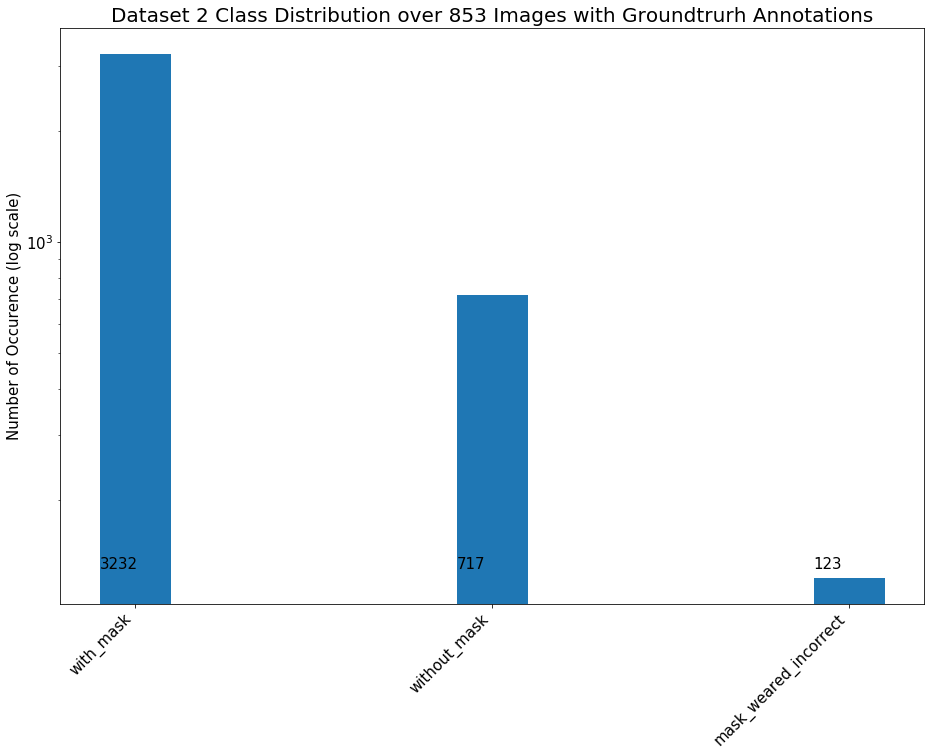

In [213]:
d2_names = list(d2_class_dict.keys())
d2_values = list(d2_class_dict.values())

d2_sorted_names = [d2_names[i] for i in np.argsort(d2_values)][::-1]
d2_sorted_values = sorted(d2_values)[::-1]

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
ax.bar(d2_sorted_names, d2_sorted_values, log=True, width=0.2)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.set_xticklabels(d2_sorted_names, rotation = 45, ha="right")

ax.set_title('Dataset 2 Class Distribution over {} Images with Groundtrurh Annotations'.format(len(d2_annot_file_path_list)), fontsize=20)
ax.set_ylabel('Number of Occurence (log scale)', fontsize=15)


for i, v in enumerate(d2_sorted_values):
    ax.text(i-.1, 130, d2_sorted_values[i], fontsize=15)
plt.show()
fig.savefig('dataset_2_distribution.png', dpi=300, format='png', bbox_inches='tight')

In [222]:
def draw_bbox_d2(img, labels, out_path=None):
    height, width, _ = img.shape
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 2, 2])
    ax.imshow(img)
    for label in labels:
        classname = label[0]
        bbox = label[1:]
#         print(bbox)
        ax.add_patch(plt.Rectangle(tuple(bbox[:2]), bbox[2]-bbox[0], bbox[3]-bbox[1], 
                                   edgecolor=d2_colors.get(classname, "g"), linewidth=2, facecolor="None"))
        plt.text(bbox[0], bbox[1], classname, fontsize=15, color=d2_colors.get(classname, "g"))
#     plt.show()
    if out_path is not None:
        plt.savefig(out_path, bbox_inches='tight')

[['with_mask', 26, 92, 44, 121], ['with_mask', 106, 88, 122, 111], ['with_mask', 122, 102, 146, 124], ['with_mask', 151, 73, 168, 94], ['without_mask', 168, 76, 190, 100], ['with_mask', 188, 96, 219, 131], ['without_mask', 192, 59, 210, 78], ['without_mask', 223, 53, 243, 76], ['without_mask', 272, 67, 291, 88], ['with_mask', 260, 93, 279, 115], ['with_mask', 288, 86, 308, 113], ['with_mask', 348, 71, 366, 91], ['mask_weared_incorrect', 303, 96, 330, 123], ['without_mask', 371, 77, 396, 100], ['without_mask', 68, 75, 80, 88], ['without_mask', 321, 70, 333, 84], ['with_mask', 367, 67, 378, 79]]


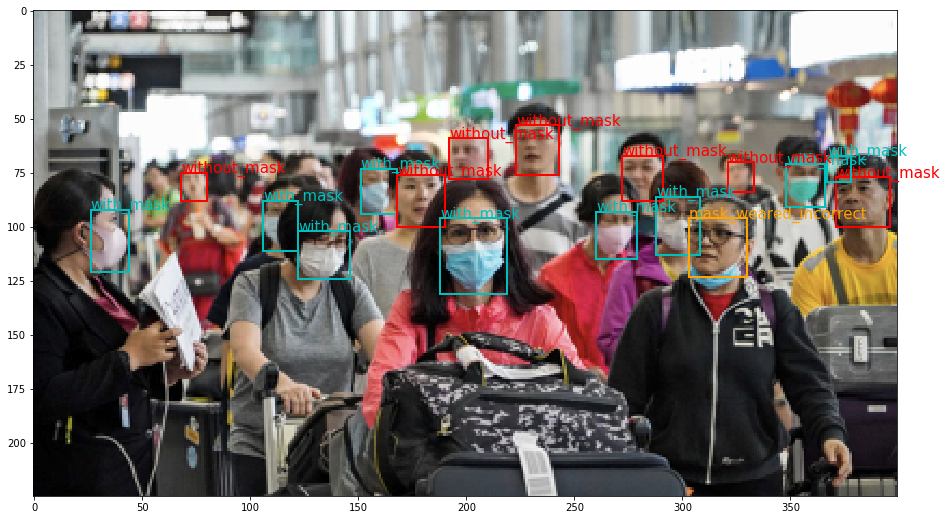

In [224]:
for i, annot_path in enumerate(d2_annot_file_path_list):
    if annot_path == '/Users/jasonzhou/Downloads/dataset2/annotations/maksssksksss388.xml':
        img_path = annot_path.replace('annotations', 'images').replace('xml', 'png')
        img = imread(img_path)
        
        xml = et.parse(annot_path)
        root = xml.getroot()
        
        labels = []
        for i in range(4, len(root)):  # index 4 is where 'object' starts
            temp = []
            temp.append(root[i][0].text)
            for point in root[i][5]:  # index 5 is where 'bndbox' starts
                temp.append(int(point.text))
            labels.append(temp)
#         print(labels)
        draw_bbox_d2(img, labels, 'sample_d2_388.jpg')    
